# Back-Order-Prediction-Analysis


#### What is Back Order Prediction
**Ans:** In simple terms, a back order is an order that a customer has placed for a product that is currently out of stock, and the supplier is unable to fulfill that order immediately. Instead, the supplier or seller must put the order on hold until they have restocked the product and can fulfill the order at a later dat.It happens with premium products which are in high demand like latest products.

Analyzing back order data is important because it can help businesses understand their customers demand patterns and supply chian performance.
This analysis tries to minimize the effects by predicting the products which are likely to go on a back order before its occurrence, so that businesses can take necessary actions at an earlier point of time, thus improving overall efficiency.

#### The dataset contains 23 columns or features, and their brief descriptions are as follows:
- **sku:** Unique ID for each product 
- **national_inv:** The current inventory level of the the product
- **lead_time:** The time taken for the supplier to deliver the product to customer
- **in_transit_qty:** The number of products that are in transit from the supplier to the seller's warehouse
- **forecast_3_month:** The forecasted demand for the product in the next 3 months
- **forecast_6_month:** The forecasted demand for the product in the next 6 months
- **forecast_9_month:** The forecasted demand for the product in the next 9 months
- **sales_1_month:** The number of units sold in the last 1 month
- **sales_3_month:** The number of units sold in the last 3 months
- **sales_6_month:** The number of units sold in the last 6 months
- **sales_9_month:** The number of units sold in the last 9 months
- **min_bank:** The minimum recommended inventory level to be maintained for the product
- **potential_issue:** A binary feature indicating whether the product has any potential issues that may cause it to go on backorder
- **pieces_past_due:** The number of units of the product that were ordered but not delivered on time
- **perf_6_month_avg:** The average performance of the product in the last 6 months
- **perf_12_month_avg:** The average performance of the product in the last 12 months
- **local_bo_qty:** The quantity of the product that is currently on backorder at the seller's warehouse
- **deck_risk:** A binary feature indicating whether the product is at risk of being damaged during transportation or storage
- **oe_constraint:** A binary feature indicating whether there are any OEM constraints for the product
- **ppap_risk:** A binary feature indicating whether there is any PPAP (Production Part Approval Process) risk for the product
- **stop_auto_buy:** A binary feature indicating whether the seller has stopped automatic reordering of the product
- **rev_stop:** A binary feature indicating whether the seller has stopped revenue recognition for the product
- **went_on_backorder:** The target variable, which is a binary feature indicating whether the product went on backorder or not

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
df_train=pd.read_csv("C:\\Users\\samar\\PycharmProjects\\Back-Order-Prediction\\Training_FileFromDB\\train_data.csv")
df_test=pd.read_csv("C:\\Users\\samar\\PycharmProjects\\Back-Order-Prediction\\Data\\Kaggle_Test_Dataset_v2.csv")

In [75]:
df= pd.concat([df_train,df_test])

In [76]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [77]:
# Dropping Last Row As it all the columns contain null values 
df.drop((df.tail(1).index),inplace=True)

In [78]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242070,3526987,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929934 entries, 0 to 242074
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                object 
 1   national_inv       float64
 2   lead_time          float64
 3   in_transit_qty     float64
 4   forecast_3_month   float64
 5   forecast_6_month   float64
 6   forecast_9_month   float64
 7   sales_1_month      float64
 8   sales_3_month      float64
 9   sales_6_month      float64
 10  sales_9_month      float64
 11  min_bank           float64
 12  potential_issue    object 
 13  pieces_past_due    float64
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       float64
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(15), object(8)
memory usage: 353.4+ MB


- There are total 1929934 datapoints and 23 features in the dataset.
- only in column lead_time  null values are present.
- Target feature is went_on_backorder and others are independent features

In [80]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.929934e+06,1.814318e+06,1.929934e+06,1.929934e+06,1.929934e+06,1.929934e+06,1.929934e+06,1.929934e+06,1.929934e+06,1.929934e+06,1.929934e+06,1.929934e+06,1.929934e+06,1.929934e+06,1.929934e+06
mean,4.965685e+02,7.878627e+00,4.306442e+01,1.785400e+02,3.454661e+02,5.066070e+02,5.536819e+01,1.746639e+02,3.415655e+02,5.235774e+02,5.277639e+01,2.016194e+00,-6.899822e+00,-6.462295e+00,6.537042e-01
std,2.957344e+04,7.054212e+00,1.295421e+03,5.108771e+03,9.831565e+03,1.434543e+04,1.884377e+03,5.188857e+03,9.585033e+03,1.473327e+04,1.257969e+03,2.296113e+02,2.659980e+01,2.588335e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


- the disturbution of features in dataset is not same, Need to do scalling 

- per_6_month_avg and per_12_month_avg have min values as -99 need to replace it with null values
- The Dataset have many outliers

In [81]:
df.sku.value_counts()

1026827    1
2870145    1
2870157    1
2870156    1
2870155    1
          ..
1991286    1
1991285    1
1991284    1
1991283    1
3526991    1
Name: sku, Length: 1929934, dtype: int64

- all the rows of sku is unique so we need to drop it 

In [82]:
df.drop(columns='sku',inplace=True)

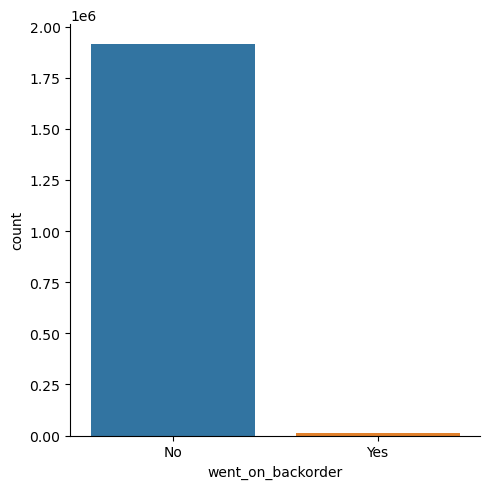

In [83]:
sns.catplot(x="went_on_backorder",kind="count",data=df)

- the dataset is Highly imbalanced

In [84]:
df.went_on_backorder.value_counts()

No     1915953
Yes      13981
Name: went_on_backorder, dtype: int64

<Axes: xlabel='went_on_backorder', ylabel='count'>

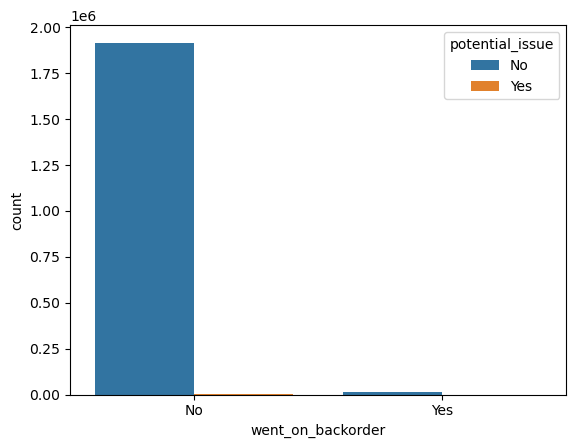

In [85]:
sns.countplot(x="went_on_backorder",hue="potential_issue",data=df)

## Box Plots
- We will see the distribution of numerical data 
- Outliers 

Text(0.5, 1.0, 'Box plot of national_inv')

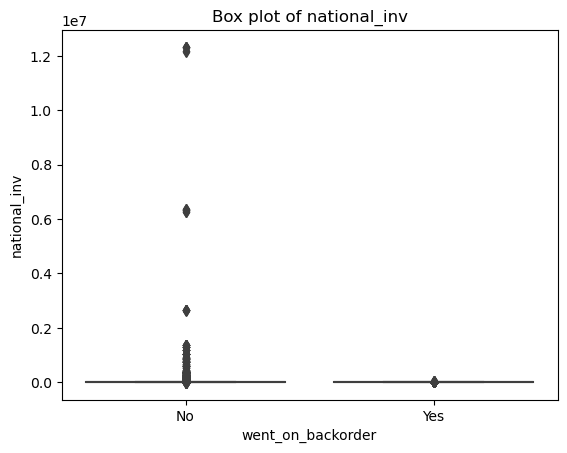

In [86]:
sns.boxplot(x='went_on_backorder',y='national_inv', data=df).set_title('Box plot of national_inv')


Text(0.5, 1.0, 'Box plot of lead_time')

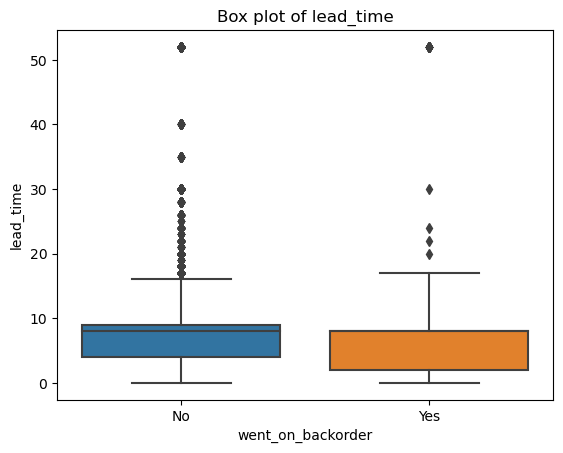

In [87]:
sns.boxplot(x='went_on_backorder',y='lead_time', data=df).set_title('Box plot of lead_time')


<Axes: xlabel='went_on_backorder', ylabel='in_transit_qty'>

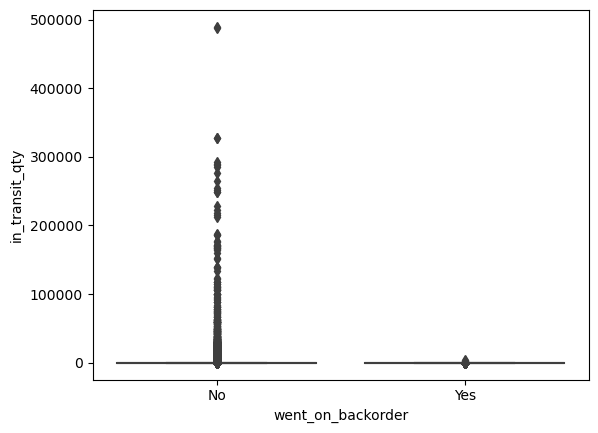

In [88]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty',data= df)

Text(0.5, 1.0, 'Box plot of in_transit_qty from 0 to 90th percentile')

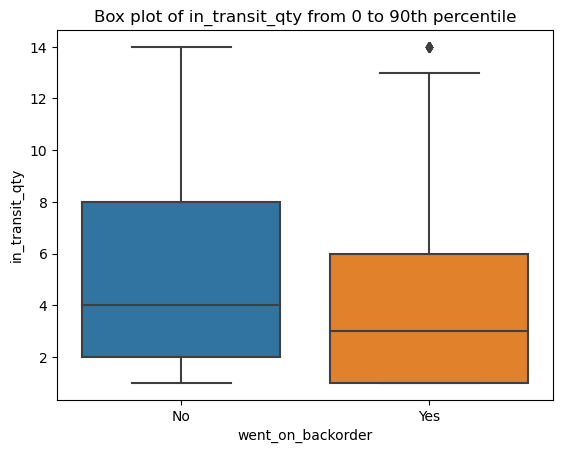

In [89]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=df[(df.in_transit_qty < df.in_transit_qty.quantile(0.90))  & (df.in_transit_qty > df.in_transit_qty.quantile(0))]).set_title('Box plot of in_transit_qty from 0 to 90th percentile')


Text(0.5, 1.0, 'Box plot of forecast_3_month from 0 to 90th percentile')

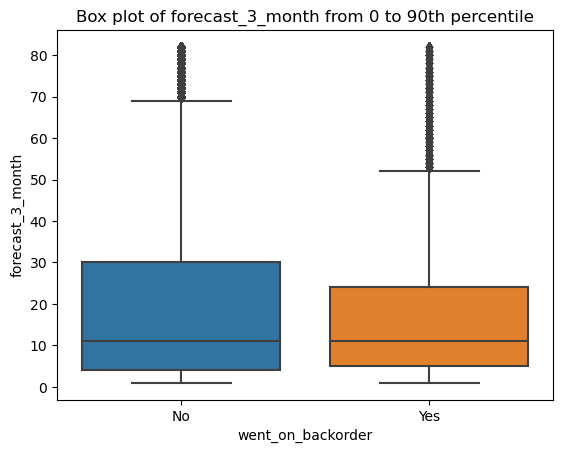

In [90]:
sns.boxplot(x='went_on_backorder',y='forecast_3_month', data=df[(df.forecast_3_month < df.forecast_3_month.quantile(0.90))  & (df.forecast_3_month > df.forecast_3_month.quantile(0))]).set_title('Box plot of forecast_3_month from 0 to 90th percentile')


Text(0.5, 1.0, 'Box plot of forecast_6_month from 0 to 90th percentile')

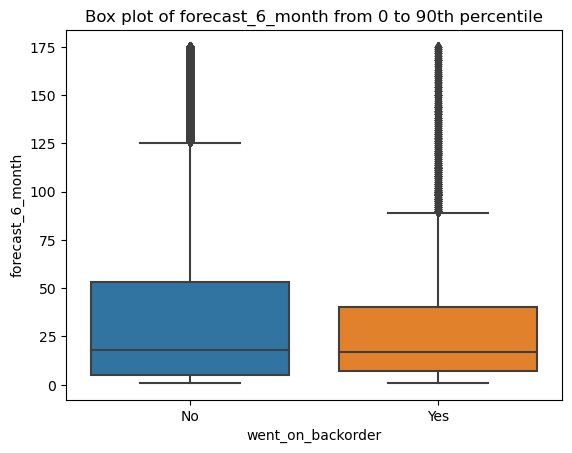

In [91]:
sns.boxplot(x='went_on_backorder',y='forecast_6_month', data=df[(df.forecast_6_month < df.forecast_6_month.quantile(0.90))  & (df.forecast_6_month > df.forecast_6_month.quantile(0))]).set_title('Box plot of forecast_6_month from 0 to 90th percentile')


Text(0.5, 1.0, 'Box plot of forecast_9_month from 0 to 90th percentile')

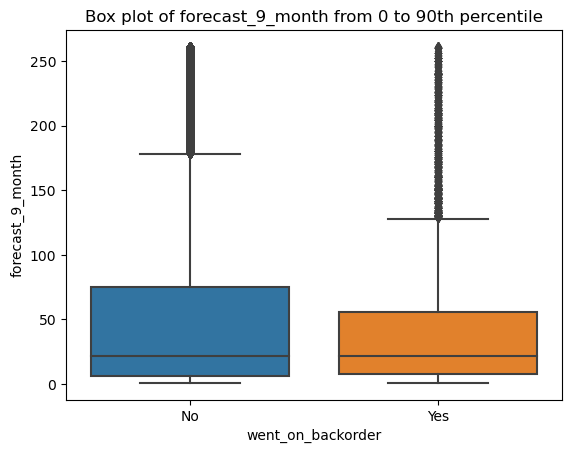

In [92]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=df[(df.forecast_9_month < df.forecast_9_month.quantile(0.90))  & (df.forecast_9_month > df.forecast_9_month.quantile(0))]).set_title('Box plot of forecast_9_month from 0 to 90th percentile')


Text(0.5, 1.0, 'Box plot of min_bank from 0 to 90th percentile')

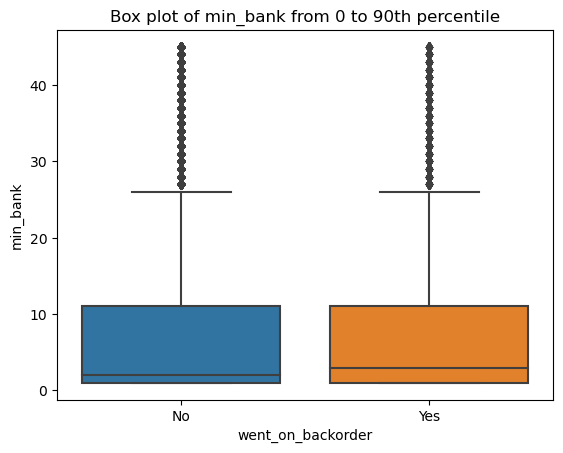

In [93]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=df[(df.min_bank < df.min_bank.quantile(0.9))  & (df.min_bank > df.min_bank.quantile(0))]).set_title('Box plot of min_bank from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of pieces_past_due')

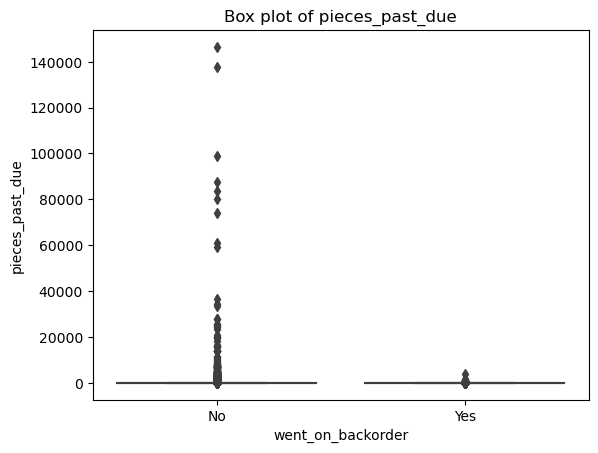

In [94]:
sns.boxplot(x='went_on_backorder',y='pieces_past_due', data=df).set_title('Box plot of pieces_past_due')


In [95]:
df[['pieces_past_due']].describe()

,pieces_past_due
count,1.929934e+06
mean,2.016194e+00
std,2.296113e+02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.464960e+05


Text(0.5, 1.0, 'Box plot of perf_6_month_avg from 0 to 90th percentile')

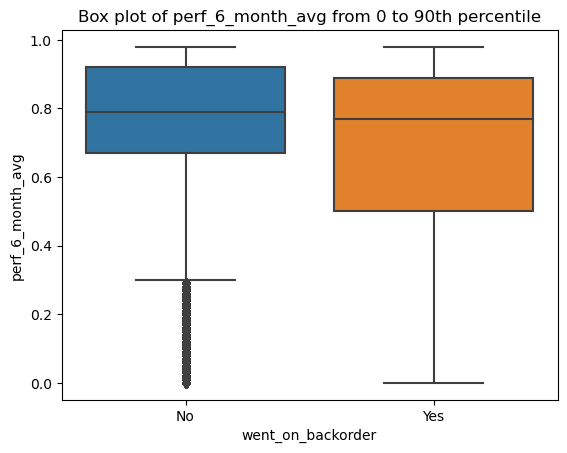

In [96]:
sns.boxplot(x='went_on_backorder',y='perf_6_month_avg', data=df[(df.perf_6_month_avg < df.perf_6_month_avg.quantile(0.9))  & (df.perf_6_month_avg > df.perf_6_month_avg.quantile(0))]).set_title('Box plot of perf_6_month_avg from 0 to 90th percentile')


Text(0.5, 1.0, 'Box plot of perf_12_month_avg from 0 to 90th percentile')

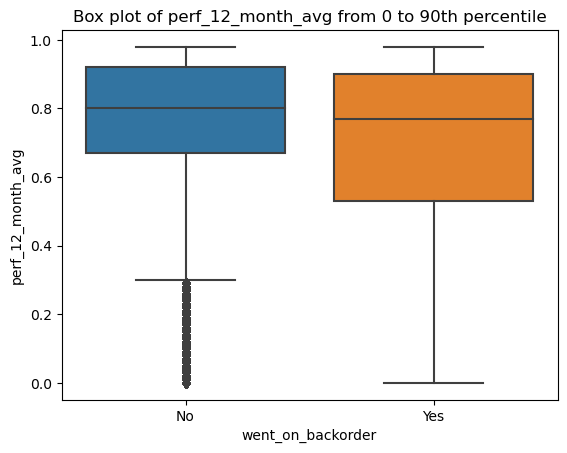

In [97]:
sns.boxplot(x='went_on_backorder',y='perf_12_month_avg', data=df[(df.perf_12_month_avg < df.perf_12_month_avg.quantile(0.9))  & (df.perf_12_month_avg > df.perf_12_month_avg.quantile(0))]).set_title('Box plot of perf_12_month_avg from 0 to 90th percentile')


In [98]:
df[['local_bo_qty']].describe()

,local_bo_qty
count,1.929934e+06
mean,6.537042e-01
std,3.543230e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.253000e+04


In [99]:
print(df.local_bo_qty.quantile(0.98))
print(df.local_bo_qty.quantile(0.99))


0.0
1.0


#### Conclustion of boxplots:
- the feature local_bo_qty and pieces_past_due can be ignored as 98% values are 0
- most of the outliers are after 90th quantiles so choosing 0 to 90th Qualtile eliminate most of the outliers
- As most of the data is skewed to the right, the majority of data lying above mean 
- the lead time feature is left skewed 
- columns perf_6_month_avg and perf_12_month_avg has max value as 1 and min value as -99 need to remove -99 and replaced with null values

In [100]:
df['perf_6_month_avg'] = df['perf_6_month_avg'].replace(-99.00, np.nan)
df['perf_12_month_avg'] = df['perf_12_month_avg'].replace(-99.00, np.nan)

In [101]:
cols = df.columns
cols_with_missing_values=[]
null_counts = df.isna().sum()  # check for the count of null values per column
for i in range(len(null_counts)):
    if null_counts[i] > 0:
        cols_with_missing_values.append(cols[i])
print(cols_with_missing_values)

['lead_time', 'perf_6_month_avg', 'perf_12_month_avg']


In [102]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
for col in cols_with_missing_values:
    df[col] = imputer.fit_transform(df[[col]])

In [103]:
df.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

#### RobustScaler is a good choice when you need to scale numerical data that contains outliers, has a non-normal distribution, or when you want a scaling method that is robust and interpretable

In [104]:
from sklearn.preprocessing import RobustScaler
df_scaled = df.copy()

# select the numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# apply the robust scaler on the numeric columns
scaler = RobustScaler()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

In [105]:
df_scaled.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,-0.197368,-0.030343,0.0,0.0,0.0,0.0,0.0,-0.066667,-0.064516,-0.085106,...,0.0,-0.165215,-0.143932,0.0,No,No,No,Yes,No,No
1,-0.171053,0.250000,0.0,0.0,0.0,0.0,0.0,-0.066667,-0.064516,-0.085106,...,0.0,0.739130,0.782609,0.0,No,No,No,Yes,No,No
2,-0.171053,-0.030343,0.0,0.0,0.0,0.0,0.0,-0.066667,-0.064516,-0.085106,...,0.0,-0.165215,-0.143932,0.0,Yes,No,No,Yes,No,No
3,-0.105263,0.000000,0.0,0.0,0.0,0.0,0.0,-0.066667,-0.064516,-0.085106,...,0.0,-3.130435,-2.956522,0.0,No,No,No,Yes,No,No
4,-0.092105,-0.030343,0.0,0.0,0.0,0.0,0.0,-0.066667,-0.064516,0.000000,...,0.0,-0.165215,-0.143932,0.0,Yes,No,No,Yes,No,No


### Converting categorical data into Numerical

In [106]:
for col in df_scaled.select_dtypes(include=['object']).columns:
    df_scaled[col] = df[col].replace({'No': 0, 'Yes': 1})



In [107]:
df_scaled.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,-0.197368,-0.030343,0.0,0.0,0.0,0.0,0.0,-0.066667,-0.064516,-0.085106,...,0.0,-0.165215,-0.143932,0.0,0,0,0,1,0,0
1,-0.171053,0.250000,0.0,0.0,0.0,0.0,0.0,-0.066667,-0.064516,-0.085106,...,0.0,0.739130,0.782609,0.0,0,0,0,1,0,0
2,-0.171053,-0.030343,0.0,0.0,0.0,0.0,0.0,-0.066667,-0.064516,-0.085106,...,0.0,-0.165215,-0.143932,0.0,1,0,0,1,0,0
3,-0.105263,0.000000,0.0,0.0,0.0,0.0,0.0,-0.066667,-0.064516,-0.085106,...,0.0,-3.130435,-2.956522,0.0,0,0,0,1,0,0
4,-0.092105,-0.030343,0.0,0.0,0.0,0.0,0.0,-0.066667,-0.064516,0.000000,...,0.0,-0.165215,-0.143932,0.0,1,0,0,1,0,0


In [108]:
df_scaled.drop(["local_bo_qty" ,"pieces_past_due"],inplace=True,axis=1)

## Feature Selection

<Axes: >

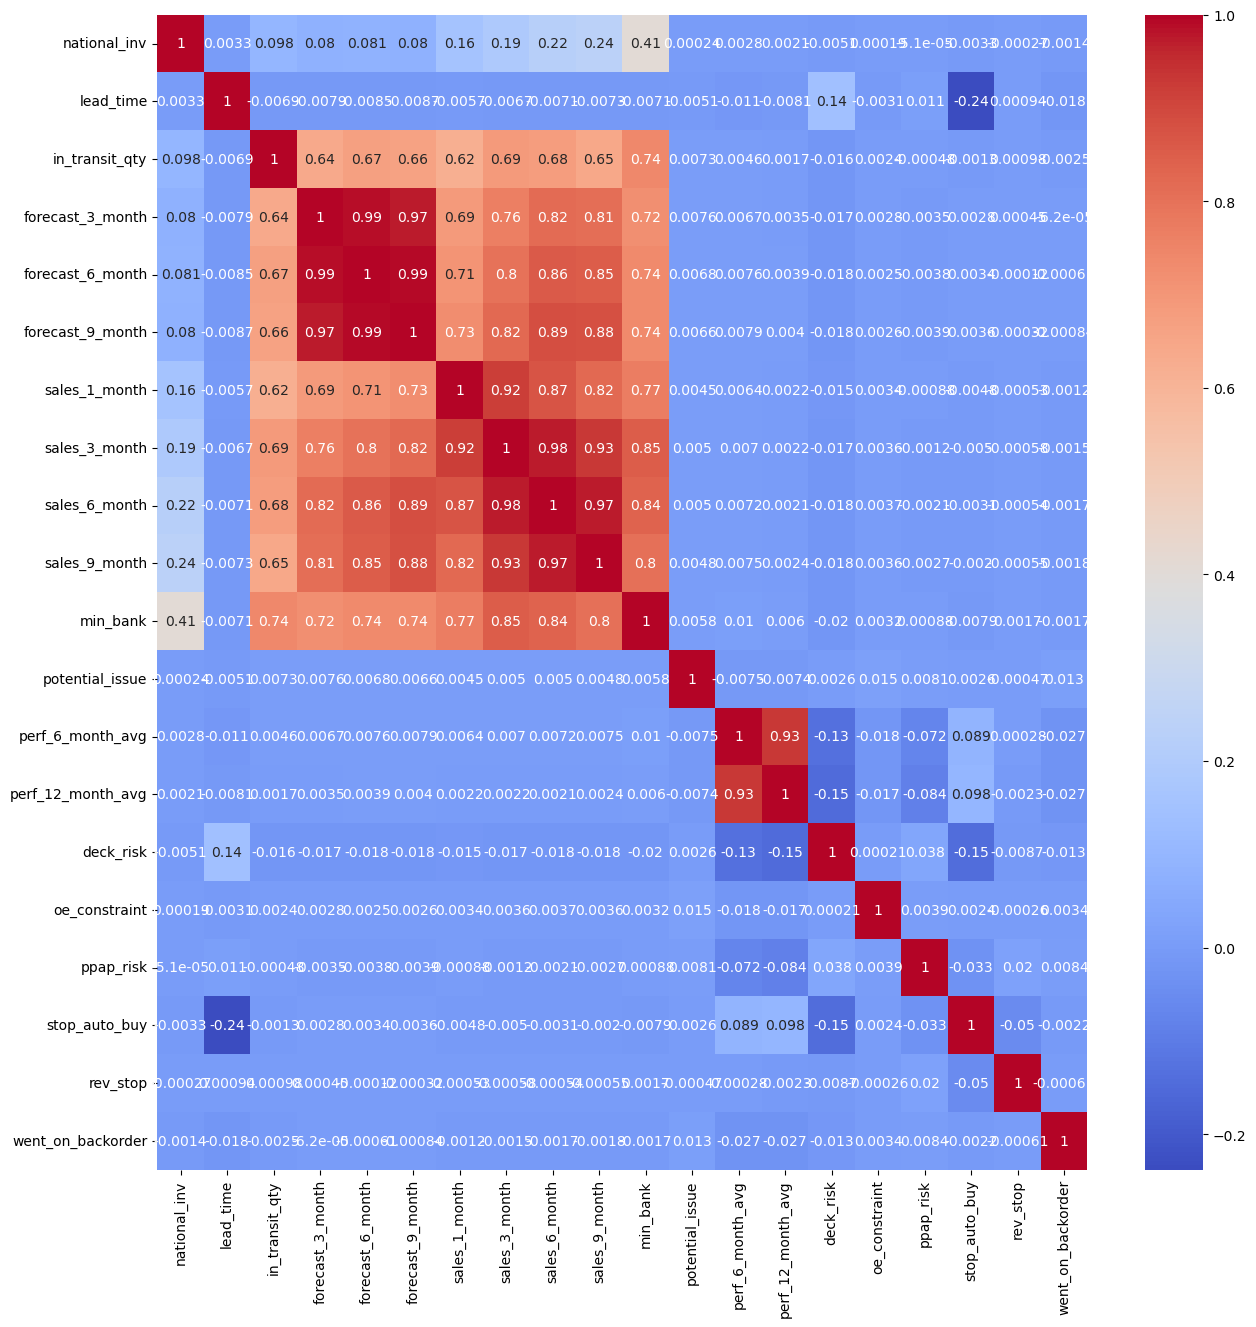

In [109]:
plt.figure(figsize=(15,15))
import seaborn as sns
corr = df_scaled.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

- forecast[3,6,9] are very strongly correlated with each other.
- Sales[1,3,6,9] are very strongly correlated with each other.
- forecast and sale columns are correlated with each other with a minimum degree of 0.62 varying upto 0.87
- per6,12 month also highly correlated wwith a degree 0.93
- min is highly correlated with sales and forecast features
- same in_transit_qty is highly correlated with sales, forecast and min_bank features

In [110]:
x=df_scaled.drop('went_on_backorder',axis=1)
y=df_scaled['went_on_backorder']

####  NearMiss is an undersampling technique in machine learning that aims to balance the class distribution of a dataset by removing some samples from the majority class. NearMiss can be a good choice when you need to balance the class distribution of an imbalanced dataset in a memory-efficient and easy-to-use way.

In [111]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()
x,y=nm.fit_resample(x,y)

In [112]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x,y)

RandomForestClassifier(random_state=0)

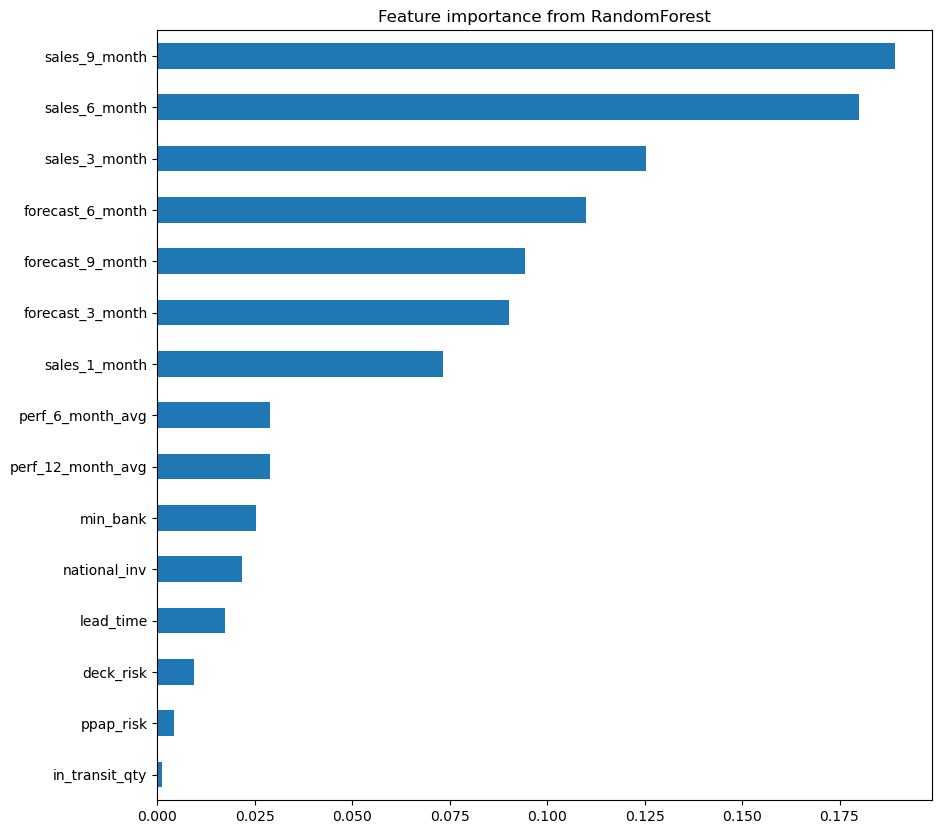

In [113]:
pd.Series(clf.feature_importances_, index = x.columns).nlargest(15).plot(kind = 'barh',\
                                                                               figsize = (10, 10),\
                                                                              title = 'Feature importance from RandomForest').invert_yaxis();
     

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

In [116]:
x_train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
27083,-0.197368,0.000000,0.0,2.00,1.166667,1.00,0.25,0.200000,0.258065,0.148936,0.000000,0,0.173913,0.434783,0,0,0,1,0
20915,-0.171053,1.000000,0.0,0.00,0.000000,0.00,0.00,-0.066667,-0.064516,-0.063830,0.333333,0,-0.565217,-0.521739,0,0,0,1,0
16816,-0.210526,0.000000,0.0,6.25,2.750000,2.05,2.25,0.533333,0.870968,0.680851,1.000000,0,0.086957,-0.173913,0,0,0,1,0
1573,-0.171053,1.000000,0.0,0.00,0.000000,0.00,0.00,-0.066667,-0.064516,-0.085106,0.000000,0,-0.173913,-0.130435,0,0,0,1,0
16304,-0.105263,0.000000,0.0,7.75,5.083333,4.80,1.75,2.066667,1.612903,1.553191,3.000000,0,-1.173913,-1.130435,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20414,-0.197368,-1.500000,0.0,12.75,7.916667,7.15,0.00,-0.066667,-0.064516,-0.085106,3.666667,0,0.304348,-0.130435,0,0,0,1,0
27516,0.065789,1.000000,0.0,37.50,12.500000,15.75,3.00,3.400000,2.677419,3.531915,9.333333,0,-1.652174,-2.521739,0,0,0,1,0
9526,-0.197368,-0.030343,0.0,0.00,0.000000,0.00,0.00,-0.066667,-0.064516,-0.085106,0.000000,0,-0.165215,-0.143932,0,0,0,1,0
9771,-0.197368,-0.030343,0.0,0.00,0.000000,0.00,0.00,-0.066667,-0.064516,-0.085106,0.000000,0,-0.165215,-0.143932,0,0,0,1,0


In [117]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)   
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy Score: ",acc_score)

Accuracy Score:  0.9856964062220633


In [122]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)
y_pred_1 = model1.predict(x_test)
acc_score = accuracy_score(y_test, y_pred_1)
print("Accuracy Score: ",acc_score)

Accuracy Score:  0.9860539960665117


In [124]:
from xgboost import XGBClassifier
model2 = XGBClassifier()
model2.fit(x_train,y_train)
y_pred_2 = model2.predict(x_test)
acc_score = accuracy_score(y_test, y_pred_2)
print("Accuracy Score: ",acc_score)

Accuracy Score:  0.9864115859109601


In [125]:
from sklearn.linear_model import LogisticRegression
model3= LogisticRegression()
model3.fit(x_train,y_train)
y_pred_3 = model3.predict(x_test)
acc_score = accuracy_score(y_test, y_pred_3)
print("Accuracy Score: ",acc_score)

Accuracy Score:  0.9433220096549259


#### - Random Forest and XGboost we can tune with GridSearchCv For Robust Model 
#### - We will Try ROC-AUC Curve to choose best Model
#### This I have Done During Training the model 